In [118]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [119]:
#assigming index id to movie_name and rearranging df so that it's the first column
movie = pd.read_csv('resources/MovieData.csv',encoding='latin-1')
movie['id'] = movie.index
movie = movie[['id'] + movie.columns[:-1].tolist()]
movie_final = movie.drop(['movie_name'], axis=1)
movie_final.head(3)

,id,production_year,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,Success_Failure_Domestic,Success_Failure_Domestic_one
0,0,2006,10000000,28444855,9920000,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0,108,1,1
1,1,2006,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0,105,1,1
2,2,2006,12000000,27838408,16086515,R,Contemporary Fiction,Original Screenplay,Live Action,Action,0,88,1,1


In [120]:
movie_final.dropna(inplace=True)
movie_final.shape

(1635, 14)

In [121]:
#Got dummies - 14169 columns...
movie_final = pd.get_dummies(movie_final)
movie_final.head(3)

,id,production_year,production_budget,domestic_box_office,international_box_office,sequel,running_time,Success_Failure_Domestic,Success_Failure_Domestic_one,rating_G,...,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western
0,0,2006,10000000,28444855,9920000,0,108,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2006,10000000,20342852,6373339,0,105,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,2006,12000000,27838408,16086515,0,88,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# #created dataframe with correlations for all columns 
# name = []
# correlation = []
# for movie in movie_final:
#     name.append(movie)
#     correlation.append(movie_final['Success_Failure_Domestic'].corr(movie_final[movie]))
# correlation_df = pd.DataFrame({'name': name, 'correlation': correlation})[['name','correlation']]
# positive_df = correlation_df.sort_values(by=['correlation'], ascending=False)
# positive_df.head(50)

In [123]:
# #making a list based off the top correlated columns to feed into regression
# top = positive_df['name'].values.tolist()[:50]
# top.remove('domestic_box_office')
# top.remove('international_box_office')
# top.remove('350k_Movies.revenue')
# top.remove('Success_Failure_Domestic')
# top.remove('Success_Failure_All')
# # top.remove('id')

# top[:50]

In [143]:
#Replace top in next cell with x_names to run it with all features

x_names = list(movie_final.columns.values)
x_names.remove('domestic_box_office')
x_names.remove('international_box_office')
x_names.remove('id')

# x_names.remove('350k_Movies.revenue')
x_names.remove('Success_Failure_Domestic')
x_names.remove('Success_Failure_Domestic_one')
print(len(x_names))
x_names

59


['production_year',
 'production_budget',
 'sequel',
 'running_time',
 'rating_G',
 'rating_NC-17',
 'rating_Not Rated',
 'rating_PG',
 'rating_PG-13',
 'rating_R',
 'creative_type_Contemporary Fiction',
 'creative_type_Dramatization',
 'creative_type_Factual',
 'creative_type_Fantasy',
 'creative_type_Historical Fiction',
 'creative_type_Kids Fiction',
 'creative_type_Multiple Creative Types',
 'creative_type_Science Fiction',
 'creative_type_Super Hero',
 'source_Based on Ballet',
 'source_Based on Comic/Graphic Novel',
 'source_Based on Factual Book/Article',
 'source_Based on Fiction Book/Short Story',
 'source_Based on Folk Tale/Legend/Fairytale',
 'source_Based on Game',
 'source_Based on Movie',
 'source_Based on Musical Group',
 'source_Based on Musical or Opera',
 'source_Based on Play',
 'source_Based on Real Life Events',
 'source_Based on Religious Text',
 'source_Based on Short Film',
 'source_Based on TV',
 'source_Based on Theme Park Ride',
 'source_Based on Toy',
 'sour

In [125]:
#logistic regression copy/paste
X = movie_final[x_names]
y = movie_final["Success_Failure_Domestic"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [127]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.800978792822186
Testing Data Score: 0.8019559902200489


In [130]:
rf = RandomForestClassifier(
  n_estimators=1000,
  max_depth=None,
  min_samples_split=10,
  class_weight="balanced"
  #min_weight_fraction_leaf=0.02
  )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.64
             precision    recall  f1-score   support

          0       0.85      0.92      0.89       328
          1       0.54      0.36      0.43        81

avg / total       0.79      0.81      0.80       409



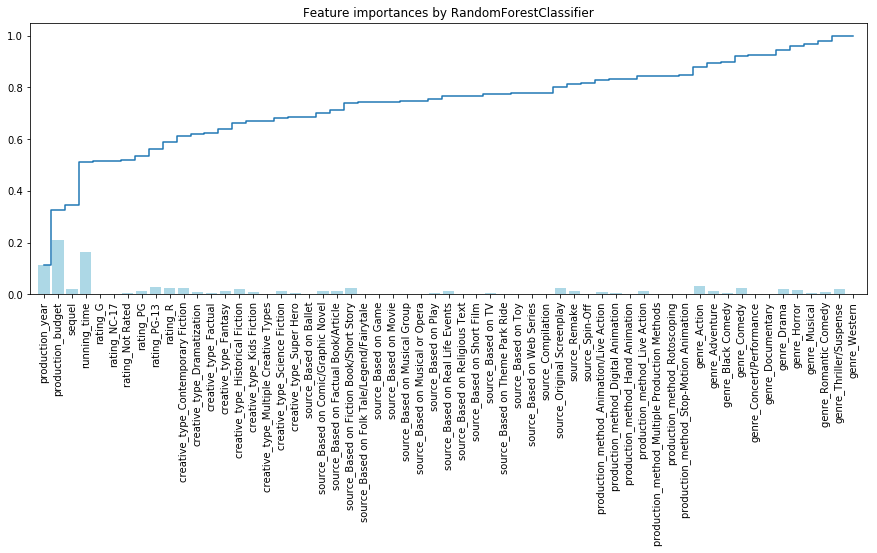

In [149]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,5))
plt.title("Feature importances by RandomForestClassifier")
plt.bar(range(len(indices)), importances, color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), x_names, rotation='vertical',fontsize=10)
plt.xlim([-1, len(indices)])
plt.show()

In [132]:
dtree = tree.DecisionTreeClassifier(
  #max_depth=3,
  class_weight="balanced",
  min_weight_fraction_leaf=0.01
  )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.58
             precision    recall  f1-score   support

          0       0.84      0.66      0.74       328
          1       0.27      0.51      0.35        81

avg / total       0.73      0.63      0.66       409



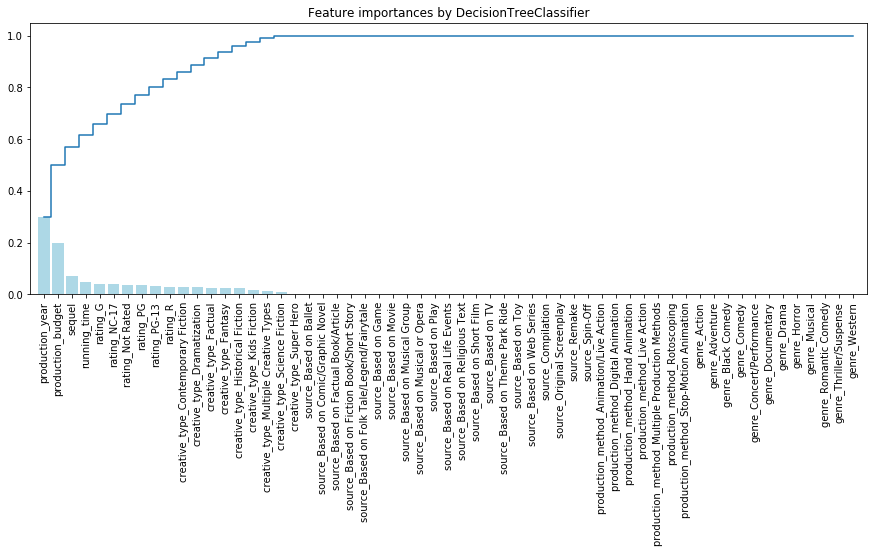

In [133]:
importances = dtree.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,5))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), x_names, rotation='vertical',fontsize=10)
plt.xlim([-1, len(indices)])
plt.show()


In [134]:
indices

array([ 1,  3,  0,  8, 53, 14, 15, 47, 10, 50, 54, 21, 48,  2, 37,  9, 22,
       56,  7, 25, 17, 23, 20, 19, 18, 16,  4,  5,  6, 13, 12, 11, 24, 58,
       26, 40, 55, 52, 51, 49, 46, 45, 44, 43, 42, 41, 39, 27, 38, 36, 35,
       34, 33, 32, 31, 30, 57, 28, 29])

In [135]:
importances

array([ 0.0696924 ,  0.29928452,  0.02356919,  0.19970825,  0.        ,
        0.        ,  0.        ,  0.00171867,  0.04847433,  0.01614521,
        0.03275261,  0.        ,  0.        ,  0.        ,  0.03878837,
        0.03599405,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02732122,  0.01471257,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.02323726,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.03595761,  0.02596206,  0.        ,
        0.02911596,  0.        ,  0.        ,  0.04196757,  0.02814667,
        0.        ,  0.00745149,  0.        ,  0.        ])

In [136]:
logis = LogisticRegression(class_weight="balanced")
logis.fit(X_train, y_train)
logic_roc_auc = roc_auc_score(y_test,logis.predict(X_test))
print(logic_roc_auc)
print(classification_report(y_test,logis.predict(X_test)))

0.5
             precision    recall  f1-score   support

          0       0.80      1.00      0.89       328
          1       0.00      0.00      0.00        81

avg / total       0.64      0.80      0.71       409



/Users/tony/anaconda3/envs/Pythonenvi/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 

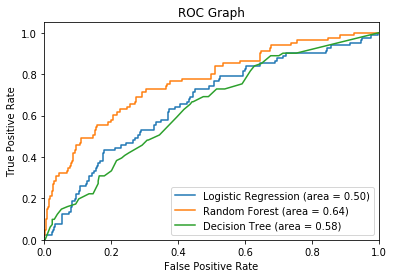

In [137]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logic_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()